In [2]:
import importlib
import func
importlib.reload(func)
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.feature_selection import VarianceThreshold
pd.options.display.max_rows = 100
%matplotlib inline
importlib.reload(func)
from sklearn.ensemble import RandomForestClassifier
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn import svm
from sklearn import tree
from sklearn.svm import NuSVC
from sklearn.metrics import roc_auc_score
from sklearn.decomposition import PCA
from sklearn.metrics import precision_recall_fscore_support
import graphviz
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler, ClusterCentroids

In [4]:
df_101_tier = pd.read_excel("data/101_tier_ira.xlsx")
# df_101_tier = df_101_tier.set_index("RTN")

In [5]:
df_101_tier.shape

(10996, 145)

## 1. Use all features and Oversampling

In [22]:
X = df_101_tier.drop(["Tier1D", "IRA"], axis=1)
# y = df_101_tier["Tier1D"]
y = df_101_tier["IRA"]

In [23]:
y.groupby(y).count()

IRA
IRA_Not_Present    6988
IRA_Present        4008
Name: IRA, dtype: int64

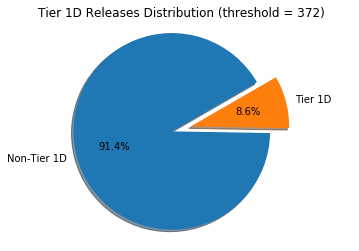

In [12]:
explode = (0.2, 0)
plt.pie(y.groupby(y).count() / len(y), explode=explode, labels=["Non-Tier 1D", "Tier 1D"],
        autopct='%1.1f%%', shadow=True, startangle=30)
plt.axis('equal')
plt.title("Tier 1D Releases Distribution (threshold = 372)")
plt.show()

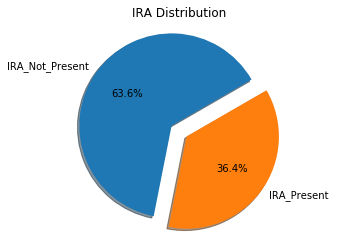

In [15]:
explode = (0.2, 0)
plt.pie(y.groupby(y).count() / len(y), explode=explode, labels=["IRA_Not_Present", "IRA_Present"],
        autopct='%1.1f%%', shadow=True, startangle=30)
plt.axis('equal')
plt.title("IRA Distribution")
plt.show()

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25,
                                                    stratify=y,
                                                    random_state=2018)

In [29]:
# X_train, X_val, y_train, y_val = train_test_split(X_train, 
#                                                     y_train, 
#                                                     test_size=0.3,
#                                                     stratify=y_train,
#                                                     random_state=2018)

In [30]:
X_train, y_train = SMOTE().fit_sample(X_train, y_train)
print(X_train.shape)
print(Counter(y_train).items())
print(X_train.shape)
print("Training size: %r" %X_train.shape[0])
print("Test size: %r" %X_test.shape[0])

(10482, 143)
dict_items([('IRA_Not_Present', 5241), ('IRA_Present', 5241)])
(10482, 143)
Training size: 10482
Test size: 2749


Confusion matrix, without normalization
[[ 736  266]
 [ 227 1520]]
                 precision    recall  f1-score   support

    IRA_Present       0.76      0.73      0.75      1002
IRA_Not_Present       0.85      0.87      0.86      1747

    avg / total       0.82      0.82      0.82      2749



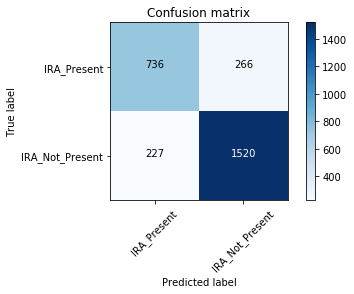

In [33]:
rf = RandomForestClassifier(n_estimators=200) #n_estimators=200, max_depth=5, max_features=0.2, n_jobs=-1
func.runclassifier(rf, X_train, y_train, X_test, y_test, ["IRA_Present", "IRA_Not_Present"])

Confusion matrix, without normalization
[[ 820  182]
 [ 363 1384]]
                 precision    recall  f1-score   support

    IRA_Present       0.69      0.82      0.75      1002
IRA_Not_Present       0.88      0.79      0.84      1747

    avg / total       0.81      0.80      0.80      2749



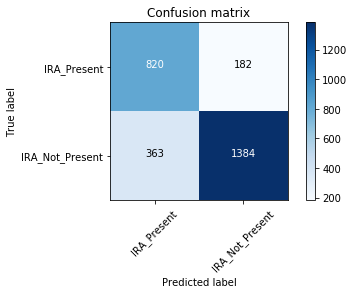

In [36]:
svc = LinearSVC(dual=False, C=0.01, penalty='l1')
func.runclassifier(svc, X_train, y_train, X_test, y_test, ["IRA_Present", "IRA_Not_Present"])

Confusion matrix, without normalization
[[ 812  190]
 [ 350 1397]]
                 precision    recall  f1-score   support

    IRA_Present       0.70      0.81      0.75      1002
IRA_Not_Present       0.88      0.80      0.84      1747

    avg / total       0.81      0.80      0.81      2749



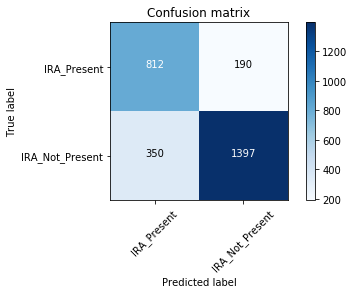

In [37]:
# {'C': 0.1, 'dual': False, 'penalty': 'l2'}
lg = LogisticRegression(C=0.1, dual=False, penalty='l2')
func.runclassifier(lg, X_train, y_train, X_test, y_test, ["IRA_Present", "IRA_Not_Present"])

In [47]:
clfs = func.Clf(X, y)
clfs.runKfold(RandomForestClassifier, {"n_estimators": [200], 
                                      'max_features': ['sqrt', 'log2', 0.2], 
                                      'max_depth': [None, 3, 4, 5]}, ["IRA_Present", "IRA_Not_Present"], True)
clfs.runKfold(RandomForestClassifier, {"n_estimators": [200], 
                                      'max_features': ['sqrt', 'log2', 0.2], 
                                      'max_depth': [None, 3, 4, 5]}, ["IRA_Present", "IRA_Not_Present"], True)
clfs.runKfold(LinearSVC, {"dual": [True], "penalty": ['l2'], 'C': [0.01, 0.1, 1, 10, 100]}, ["IRA_Present", "IRA_Not_Present"], True)
clfs.runKfold(LinearSVC, {"dual": [False], "penalty": ['l2'], 'C': [0.01, 0.1, 1, 10, 100]}, ["IRA_Present", "IRA_Not_Present"], True)
clfs.runKfold(LinearSVC, {"dual": [False], "penalty": ['l1'], 'C': [0.01, 0.1, 1, 10, 100]}, ["IRA_Present", "IRA_Not_Present"], True)
clfs.runKfold(LogisticRegression, {"penalty": ['l1', 'l2'], 'dual': [False], "C": [0.01, 0.1, 1, 10, 100]}, ["IRA_Present", "IRA_Not_Present"], True)
clfs.runKfold(LogisticRegression, {"penalty": ['l2'], 'dual': [True], "C": [0.01, 0.1, 1, 10, 100]}, ["IRA_Present", "IRA_Not_Present"], True)

In [48]:
clfs.clf_eval

,clf,params,smote,Trecall,Tprecision,Tf1,Frecall,Fprecision,Ff1
0,RandomForestClassifier,"{'max_depth': None, 'max_features': 'sqrt', 'n...",True,0.721307,0.770302,0.744768,0.876503,0.845911,0.860866
1,RandomForestClassifier,"{'max_depth': None, 'max_features': 'log2', 'n...",True,0.717814,0.778803,0.746842,0.882942,0.845231,0.863611
2,RandomForestClassifier,"{'max_depth': None, 'max_features': 0.2, 'n_es...",True,0.719810,0.766909,0.742354,0.874356,0.844904,0.859298
3,RandomForestClassifier,"{'max_depth': 3, 'max_features': 'sqrt', 'n_es...",True,0.765469,0.695249,0.728379,0.807241,0.857408,0.831417
4,RandomForestClassifier,"{'max_depth': 3, 'max_features': 'log2', 'n_es...",True,0.772455,0.697078,0.732581,0.807241,0.861055,0.833153
5,RandomForestClassifier,"{'max_depth': 3, 'max_features': 0.2, 'n_estim...",True,0.775200,0.706120,0.738317,0.814110,0.863839,0.837881
6,RandomForestClassifier,"{'max_depth': 4, 'max_features': 'sqrt', 'n_es...",True,0.788673,0.704960,0.744180,0.810246,0.870065,0.838939
7,RandomForestClassifier,"{'max_depth': 4, 'max_features': 'log2', 'n_es...",True,0.777695,0.701593,0.737421,0.809960,0.864201,0.836064
8,RandomForestClassifier,"{'max_depth': 4, 'max_features': 0.2, 'n_estim...",True,0.773952,0.716143,0.742995,0.822839,0.864478,0.842724
9,RandomForestClassifier,"{'max_depth': 5, 'max_features': 'sqrt', 'n_es...",True,0.774950,0.717086,0.744563,0.824127,0.864770,0.843799


## 2. Feature Selection

In [17]:
# Use random forest to extract useful features
# Use all the data
rfmodel = RandomForestClassifier(n_estimators=200, n_jobs=-1)
rfmodel.fit(X, y)
feat_import = pd.DataFrame({"Feature": X.columns, "Importance": rfmodel.feature_importances_})\
        .sort_values("Importance", ascending=False)

In [21]:
feat_import.iloc[:10, :]

,Feature,Importance
120,H13AVOLUME,0.039945
55,D4J,0.038549
74,D8A,0.037056
17,C6H,0.025425
106,G4,0.025362
32,D10I,0.024246
24,D10A,0.024228
50,D4E,0.023428
112,H1,0.022912
0,A1,0.021651


In [18]:
feat_import['Feature'][:10].tolist()

['H13AVOLUME', 'D4J', 'D8A', 'C6H', 'G4', 'D10I', 'D10A', 'D4E', 'H1', 'A1']

In [19]:
feat10 = feat_import['Feature'][:10].tolist()

In [20]:
feat10

['H13AVOLUME', 'D4J', 'D8A', 'C6H', 'G4', 'D10I', 'D10A', 'D4E', 'H1', 'A1']

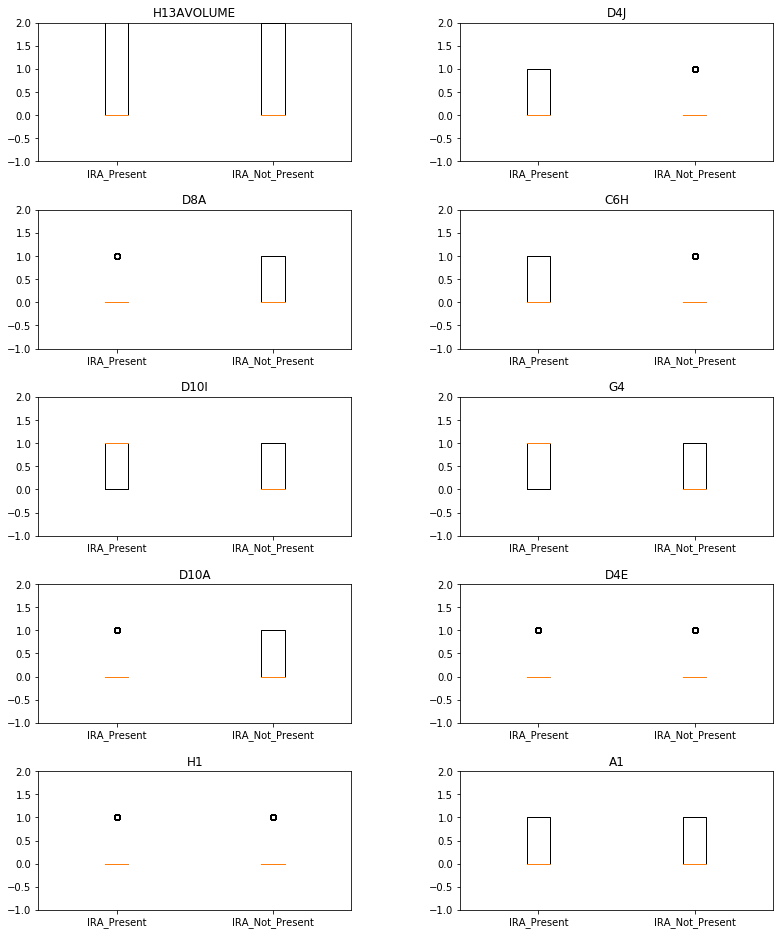

In [103]:
plt.figure(figsize=(12,16))
# plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
for i in range(len(feat10)):
    dat = [X[y == 'IRA_Present'][feat10[i]].values, X[y != 'IRA_Present'][feat10[i]].values]
    plt.subplot(5, 2, i + 1)
    plt.title(feat10[i])
    plt.boxplot(dat)
    plt.ylim((-1,2))
    plt.xticks([1, 2], ['IRA_Present', 'IRA_Not_Present'])
plt.subplots_adjust(top=0.92, bottom=0.15, left=0.10, right=0.95, hspace=0.35, wspace=0.35)
plt.show()

(-1, 2)

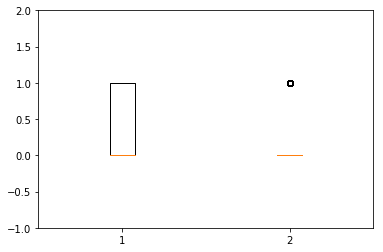

In [83]:
plt.boxplot(dat)
plt.ylim((-1,2))

In [62]:
dt = DecisionTreeClassifier(max_depth=3, class_weight='balanced')
dt.fit(X, y)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

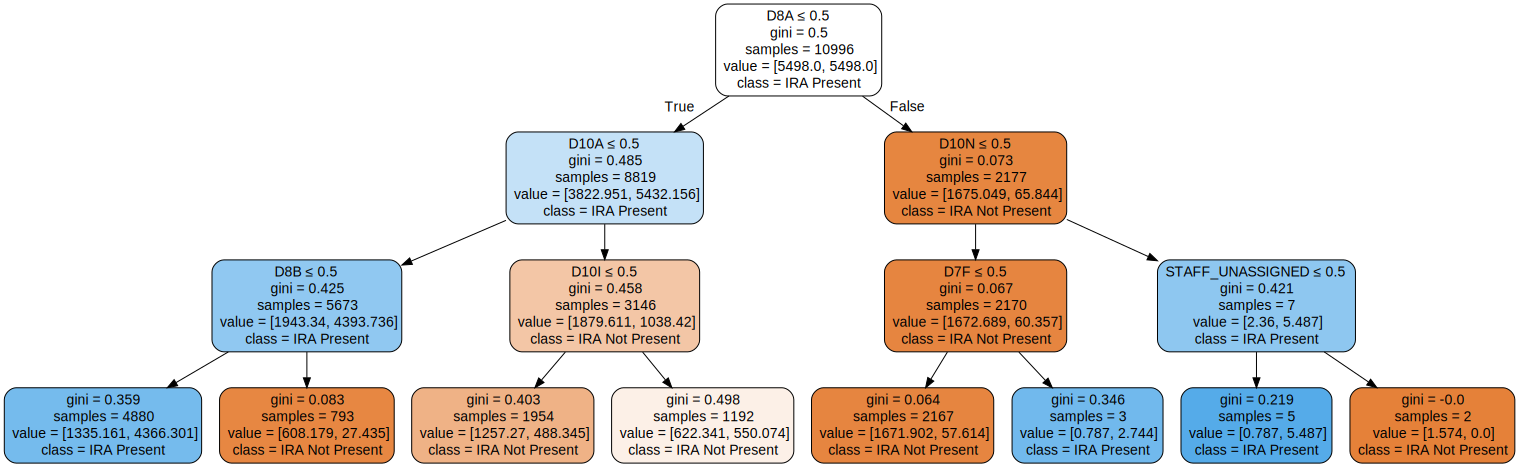

In [63]:
dot_data = tree.export_graphviz(dt, out_file=None, 
                         feature_names=X.columns,  
                         class_names=["IRA Not Present", "IRA Present"],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

## 2. Tier1D as greater than 365

In [110]:
df_101_tier_new = pd.read_excel("data/df_101_tier_new.xlsx")
df_101_tier_new = df_101_tier_new.set_index("RTN")

In [111]:
X = df_101_tier_new.drop(["Tier1D"], axis=1)
#y = df_101_tier[["Tier1D"]]
y = df_101_tier_new["Tier1D"]

In [24]:
rfmodel = RandomForestClassifier(n_estimators=200, n_jobs=-1)
rfmodel.fit(X, y)
feat_import = pd.DataFrame({"Feature": X.columns, "Importance": rfmodel.feature_importances_})\
        .sort_values("Importance", ascending=False)
feat_import.iloc[:10, :]

,Feature,Importance
120,H13AVOLUME,0.042198
74,D8A,0.036218
55,D4J,0.036181
17,C6H,0.029631
69,D7B,0.025888
106,G4,0.024556
24,D10A,0.022692
32,D10I,0.022192
0,A1,0.021511
50,D4E,0.021036


In [112]:
y.groupby(y).count()

Tier1D
0    9900
1    3121
Name: Tier1D, dtype: int64

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25,
                                                    stratify=y,
                                                    random_state=2018)

In [114]:
X_train, y_train = SMOTE().fit_sample(X_train, y_train)
print(X_train.shape)
print(Counter(y_train).items())
print(X_train.shape)
print("Training size: %r" %X_train.shape[0])
print("Test size: %r" %X_test.shape[0])

(14848, 143)
dict_items([(1, 7424), (0, 7424)])
(14848, 143)
Training size: 14848
Test size: 3256


Confusion matrix, without normalization
[[ 348  432]
 [ 415 2061]]
             precision    recall  f1-score   support

    Tier 1D       0.46      0.45      0.45       780
      other       0.83      0.83      0.83      2476

avg / total       0.74      0.74      0.74      3256



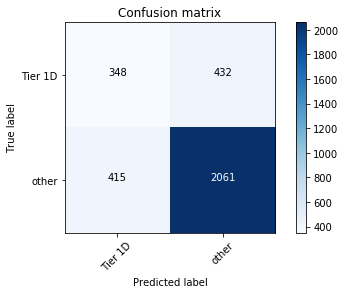

In [123]:
rf = RandomForestClassifier(n_estimators=200) #n_estimators=200, max_depth=5, max_features=0.2, n_jobs=-1
func.runclassifier(rf, X_train, y_train, X_test, y_test, [True, False])

Confusion matrix, without normalization
[[ 611  169]
 [ 887 1589]]
             precision    recall  f1-score   support

    Tier 1D       0.41      0.78      0.54       780
      other       0.90      0.64      0.75      2476

avg / total       0.79      0.68      0.70      3256



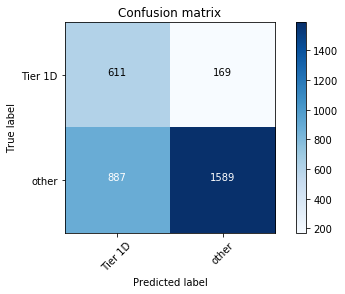

In [133]:
# {'C': 0.01, 'dual': False, 'penalty': 'l1'}
svc = LinearSVC(C=0.01, dual=False, penalty='l1')
func.runclassifier(svc, X_train, y_train, X_test, y_test, [True, False])

In [128]:
clfs = func.Clf(X, y, [True, False])
clfs.runKfold(RandomForestClassifier, {"n_estimators": [200], 
                                      'max_features': ['sqrt', 'log2', 0.2], 
                                      'max_depth': [None, 3, 4, 5]}, ["IRA_Present", "IRA_Not_Present"], True)
clfs.runKfold(RandomForestClassifier, {"n_estimators": [200], 
                                      'max_features': ['sqrt', 'log2', 0.2], 
                                      'max_depth': [None, 3, 4, 5]}, ["IRA_Present", "IRA_Not_Present"], True)
clfs.runKfold(LinearSVC, {"dual": [True], "penalty": ['l2'], 'C': [0.01, 0.1, 1, 10, 100]}, ["IRA_Present", "IRA_Not_Present"], True)
clfs.runKfold(LinearSVC, {"dual": [False], "penalty": ['l2'], 'C': [0.01, 0.1, 1, 10, 100]}, ["IRA_Present", "IRA_Not_Present"], True)
clfs.runKfold(LinearSVC, {"dual": [False], "penalty": ['l1'], 'C': [0.01, 0.1, 1, 10, 100]}, ["IRA_Present", "IRA_Not_Present"], True)
clfs.runKfold(LogisticRegression, {"penalty": ['l1', 'l2'], 'dual': [False], "C": [0.01, 0.1, 1, 10, 100]}, ["IRA_Present", "IRA_Not_Present"], True)
clfs.runKfold(LogisticRegression, {"penalty": ['l2'], 'dual': [True], "C": [0.01, 0.1, 1, 10, 100]}, ["IRA_Present", "IRA_Not_Present"], True)

In [129]:
clfs.clf_eval

,clf,params,smote,Trecall,Tprecision,Tf1,Frecall,Fprecision,Ff1
0,RandomForestClassifier,"{'max_depth': None, 'max_features': 'sqrt', 'n...",True,0.461715,0.471604,0.466578,0.837071,0.831474,0.834258
1,RandomForestClassifier,"{'max_depth': None, 'max_features': 'log2', 'n...",True,0.468124,0.475326,0.471690,0.837172,0.833144,0.835152
2,RandomForestClassifier,"{'max_depth': None, 'max_features': 0.2, 'n_es...",True,0.461396,0.468623,0.464964,0.835152,0.831055,0.833095
3,RandomForestClassifier,"{'max_depth': 3, 'max_features': 'sqrt', 'n_es...",True,0.771865,0.395838,0.523182,0.628586,0.897564,0.739224
4,RandomForestClassifier,"{'max_depth': 3, 'max_features': 'log2', 'n_es...",True,0.759054,0.399197,0.523123,0.639899,0.894092,0.745824
5,RandomForestClassifier,"{'max_depth': 3, 'max_features': 0.2, 'n_estim...",True,0.823136,0.380693,0.520568,0.577879,0.912139,0.707446
6,RandomForestClassifier,"{'max_depth': 4, 'max_features': 'sqrt', 'n_es...",True,0.778924,0.402570,0.530692,0.635657,0.901440,0.745440
7,RandomForestClassifier,"{'max_depth': 4, 'max_features': 'log2', 'n_es...",True,0.761298,0.405364,0.528930,0.647980,0.896153,0.752014
8,RandomForestClassifier,"{'max_depth': 4, 'max_features': 0.2, 'n_estim...",True,0.809035,0.392150,0.528135,0.604444,0.909580,0.726102
9,RandomForestClassifier,"{'max_depth': 5, 'max_features': 'sqrt', 'n_es...",True,0.768341,0.409248,0.533862,0.650101,0.899188,0.754444


In [26]:
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
Xs = sel.fit_transform(X)

In [27]:
Xsf = X.columns[sel.variances_ > .8 * (1 - .8)].tolist()

In [28]:
Xs = pd.DataFrame(Xs, columns=Xsf)

In [30]:
len(Xsf)

25

In [142]:
Xs[Xsf].describe()

,A1,B6,C6L,D10A,D10I,D4M,D4N,D6A,D9G,D9L,...,H13A,H13AOFFSITE,H13AVOLUME,H13BVOLUME,H13CVOLUME,H16,H3,LUST_ELIGIBLE_NO,LUST_ELIGIBLE_UNKNOWN,STAFF_UNASSIGNED
count,13021.000000,13021.000000,13021.000000,13021.000000,13021.000000,13021.000000,13021.000000,13021.000000,13021.000000,13021.000000,...,13021.000000,13021.000000,13021.000000,13021.000000,13021.000000,13021.000000,13021.000000,13021.000000,13021.000000,13021.000000
mean,0.404116,0.444666,0.309577,0.294524,0.544812,0.225098,0.210967,0.488903,0.276784,0.238077,...,0.336226,0.332617,71.904923,0.246986,4.460257,0.431303,0.380539,0.680977,0.284694,0.429767
std,0.490739,0.496948,0.462337,0.455846,0.498007,0.417663,0.408011,0.499896,0.447426,0.425923,...,0.472435,0.471169,1002.579377,7.573915,258.071509,0.495277,0.485538,0.466116,0.451286,0.495062
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,1.000000,1.000000,20.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,70000.000000,500.000000,25000.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [143]:
rf = RandomForestClassifier(n_estimators=500)
rf.fit(Xs, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [145]:
feat_import = pd.DataFrame({"Feature": Xs.columns, "Importance": rf.feature_importances_})\
        .sort_values("Importance", ascending=False)

In [148]:
clfs = func.Clf(Xs, y, [True, False])
clfs.runKfold(RandomForestClassifier, {"n_estimators": [200], 
                                      'max_features': ['sqrt', 'log2', 0.2], 
                                      'max_depth': [None, 3, 4, 5]}, ["IRA_Present", "IRA_Not_Present"], True)
clfs.runKfold(RandomForestClassifier, {"n_estimators": [200], 
                                      'max_features': ['sqrt', 'log2', 0.2], 
                                      'max_depth': [None, 3, 4, 5]}, ["IRA_Present", "IRA_Not_Present"], True)
clfs.runKfold(LinearSVC, {"dual": [True], "penalty": ['l2'], 'C': [0.01, 0.1, 1, 10, 100]}, ["IRA_Present", "IRA_Not_Present"], True)
clfs.runKfold(LinearSVC, {"dual": [False], "penalty": ['l2'], 'C': [0.01, 0.1, 1, 10, 100]}, ["IRA_Present", "IRA_Not_Present"], True)
clfs.runKfold(LinearSVC, {"dual": [False], "penalty": ['l1'], 'C': [0.01, 0.1, 1, 10, 100]}, ["IRA_Present", "IRA_Not_Present"], True)
clfs.runKfold(LogisticRegression, {"penalty": ['l1', 'l2'], 'dual': [False], "C": [0.01, 0.1, 1, 10, 100]}, ["IRA_Present", "IRA_Not_Present"], True)
clfs.runKfold(LogisticRegression, {"penalty": ['l2'], 'dual': [True], "C": [0.01, 0.1, 1, 10, 100]}, ["IRA_Present", "IRA_Not_Present"], True)

In [149]:
clfs.clf_eval

,clf,params,smote,Trecall,Tprecision,Tf1,Frecall,Fprecision,Ff1
0,RandomForestClassifier,"{'max_depth': None, 'max_features': 'sqrt', 'n...",True,0.514911,0.418475,0.461672,0.774646,0.835187,0.803766
1,RandomForestClassifier,"{'max_depth': None, 'max_features': 'log2', 'n...",True,0.509458,0.419155,0.459906,0.777475,0.834103,0.804791
2,RandomForestClassifier,"{'max_depth': None, 'max_features': 0.2, 'n_es...",True,0.516192,0.418114,0.461956,0.773737,0.835392,0.803368
3,RandomForestClassifier,"{'max_depth': 3, 'max_features': 'sqrt', 'n_es...",True,0.731495,0.394848,0.512835,0.646667,0.884337,0.747027
4,RandomForestClassifier,"{'max_depth': 3, 'max_features': 'log2', 'n_es...",True,0.731817,0.395036,0.513078,0.646667,0.884398,0.747054
5,RandomForestClassifier,"{'max_depth': 3, 'max_features': 0.2, 'n_estim...",True,0.735345,0.396411,0.515110,0.646970,0.885771,0.747752
6,RandomForestClassifier,"{'max_depth': 4, 'max_features': 'sqrt', 'n_es...",True,0.734379,0.399173,0.517189,0.651616,0.886202,0.750993
7,RandomForestClassifier,"{'max_depth': 4, 'max_features': 'log2', 'n_es...",True,0.721242,0.400413,0.514924,0.659596,0.882488,0.754916
8,RandomForestClassifier,"{'max_depth': 4, 'max_features': 0.2, 'n_estim...",True,0.731815,0.399195,0.516588,0.652828,0.885374,0.751517
9,RandomForestClassifier,"{'max_depth': 5, 'max_features': 'sqrt', 'n_es...",True,0.728618,0.405511,0.520971,0.663232,0.885827,0.758477


In [153]:
X_train, X_test, y_train, y_test = train_test_split(Xs, 
                                                    y, 
                                                    test_size=0.25,
                                                    stratify=y,
                                                    random_state=2018)

In [151]:
# X_train, y_train = SMOTE().fit_sample(X_train, y_train)
# print(X_train.shape)
# print(Counter(y_train).items())
# print(X_train.shape)
# print("Training size: %r" %X_train.shape[0])
# print("Test size: %r" %X_test.shape[0])

(14848, 25)
dict_items([(1, 7424), (0, 7424)])
(14848, 25)
Training size: 14848
Test size: 3256


In [ ]:
svc = SVC(kernel='poly', class_weight='balanced')
func.runclassifier(svc, X_train, y_train, X_test, y_test, [True, False])